In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import sweetviz as sv 
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

: 

In [2]:
strt=pd.read_csv("C:\\Users\\Hi\\Desktop\\Python Datasets\\50_Startups.csv")
strt.head()

,RD_Spend,Administration,Marketing_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
strt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RD_Spend         50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing_Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


RD_Spend              AxesSubplot(0.125,0.657941;0.227941x0.222059)
Administration     AxesSubplot(0.398529,0.657941;0.227941x0.222059)
Marketing_Spend    AxesSubplot(0.672059,0.657941;0.227941x0.222059)
Profit                AxesSubplot(0.125,0.391471;0.227941x0.222059)
dtype: object

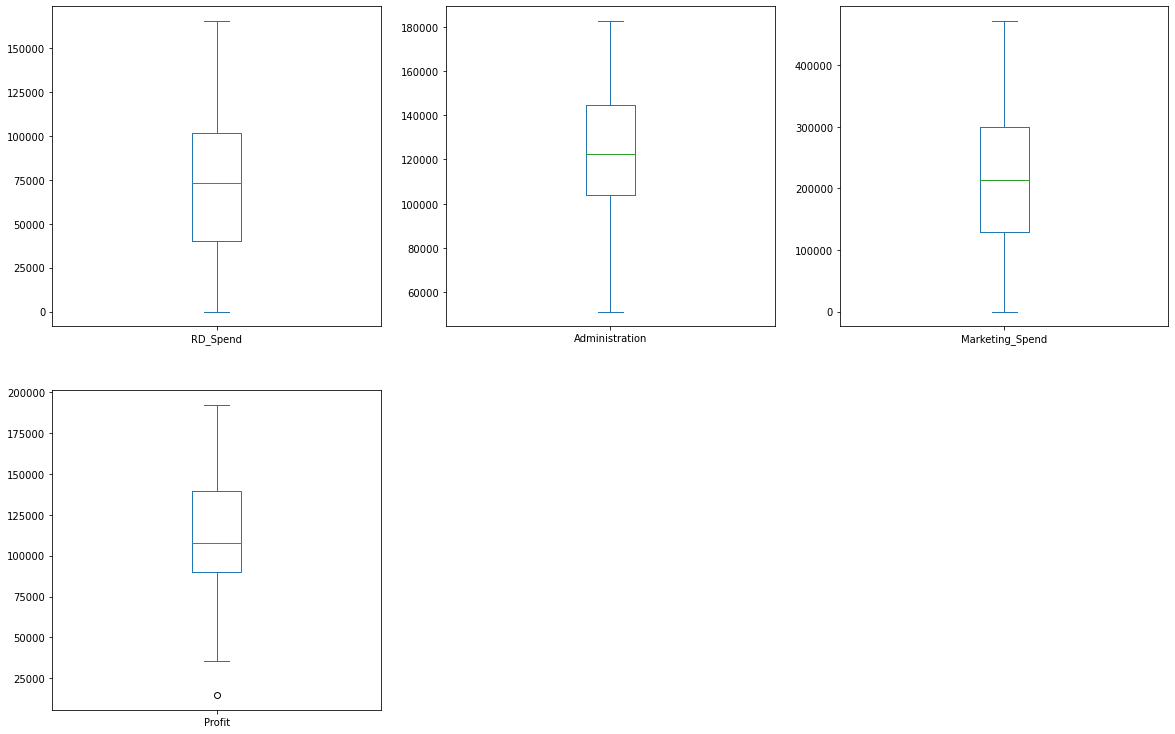

In [4]:
strt.plot(kind='box',subplots=True, layout=(3,3),figsize=(20,20))

In [5]:
strt1=pd.get_dummies(data=strt,columns=['State'])

In [6]:
strt1.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


In [7]:
from scipy import stats
zsc=stats.zscore(strt1)

In [8]:
zscores=np.abs(zsc)

In [9]:
filter_zscores=(zscores<3).all(axis=1)

In [10]:
filtered=strt1[filter_zscores]

In [11]:
filtered.shape #seems like there are no outliers as we can see after transforming df and trying to eliminate the zvalues above 3 and below -3 no row got eliminated 

(50, 7)

In [12]:
#Lets Try Isolation Forest method 
#clf=IsolationForest(random_state=20,contamination=0.05) #based on domain knowledge the contamination value should be set
#clf.fit(strt1)

In [13]:
#strt1['scores']=clf.decision_function(strt1)

In [14]:
#strt1['anamoly']=clf.predict(strt1)

In [15]:
#strt1

In [16]:
strt1.corr() #we can observe that there is no multicollinearity problem between the independent variables

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida,State_New York
RD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711,0.039068
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493,0.005145
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685,-0.033670
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244,0.031368
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366,-0.515152
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000,-0.492366
State_New York,0.039068,0.005145,-0.033670,0.031368,-0.515152,-0.492366,1.000000


<AxesSubplot:>

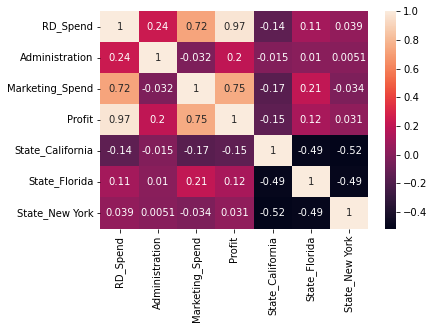

In [17]:
sns.heatmap(strt1.corr(),annot=True)
#we can consider multicollinearity prob when correlation 'r' value is above 0.75 its nominal to consider for multicollinearity
#there is barely any correlation between State_New_York vs Profit which is 0.031 we can drop this column

In [18]:
strt2=strt1.drop(['State_New York'],axis=1)
strt2.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [19]:
scaler=MinMaxScaler(feature_range=(0,1))
columns=strt2.columns
d=scaler.fit_transform(strt2)
normdf=pd.DataFrame(d,columns=columns)
normdf.head()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida
0,1.000000,0.651744,1.000000,1.000000,0.0,0.0
1,0.983359,0.761972,0.940893,0.997355,1.0,0.0
2,0.927985,0.379579,0.864664,0.993178,0.0,1.0
3,0.873136,0.512998,0.812235,0.947292,0.0,0.0
4,0.859438,0.305328,0.776136,0.853171,0.0,1.0


In [20]:
sweet_report=sv.analyze(strt2)
sweet_report.show_html('EDA_of_50Startups.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_of_50Startups.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [21]:
normdf.corr()

,RD_Spend,Administration,Marketing_Spend,Profit,State_California,State_Florida
RD_Spend,1.000000,0.241955,0.724248,0.972900,-0.143165,0.105711
Administration,0.241955,1.000000,-0.032154,0.200717,-0.015478,0.010493
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766,-0.168875,0.205685
Profit,0.972900,0.200717,0.747766,1.000000,-0.145837,0.116244
State_California,-0.143165,-0.015478,-0.168875,-0.145837,1.000000,-0.492366
State_Florida,0.105711,0.010493,0.205685,0.116244,-0.492366,1.000000


In [22]:
model= smf.ols('Profit~RD_Spend+Administration+Marketing_Spend+State_California+State_Florida',data=normdf).fit()
#here had to change the column name as the code was showing error because the smf was treating R as separate in R&D_Spend column


In [23]:
model.params

Intercept           0.191559
RD_Spend            0.750507
Administration     -0.019976
Marketing_Spend     0.071678
State_California    0.000236
State_Florida       0.001355
dtype: float64

In [24]:
model.tvalues, '\n', model.pvalues

(Intercept            7.103066
 RD_Spend            17.368580
 Administration      -0.517012
 Marketing_Spend      1.573889
 State_California     0.012864
 State_Florida        0.072083
 dtype: float64,
 '\n',
 Intercept           8.075600e-09
 RD_Spend            2.578772e-21
 Administration      6.077373e-01
 Marketing_Spend     1.226769e-01
 State_California    9.897941e-01
 State_Florida       9.428623e-01
 dtype: float64)

In [25]:
#lets build model2 only on RD_SPend,ADministration,Marketing_Spend
model2=smf.ols('Profit~RD_Spend+Administration+Marketing_Spend',data=normdf).fit()

In [26]:
model2.params

Intercept          0.191832
RD_Spend           0.750220
Administration    -0.019837
Marketing_Spend    0.072338
dtype: float64

In [27]:
model2.tvalues, '\n',model2.pvalues 

(Intercept           7.875952
 RD_Spend           17.846374
 Administration     -0.525507
 Marketing_Spend     1.655077
 dtype: float64,
 '\n',
 Intercept          4.508627e-10
 RD_Spend           2.634968e-22
 Administration     6.017551e-01
 Marketing_Spend    1.047168e-01
 dtype: float64)

In [28]:
normdf1=normdf.drop(['State_California','State_Florida'],axis=1)

In [29]:
normdf1.corr()

,RD_Spend,Administration,Marketing_Spend,Profit
RD_Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [30]:
#Let us build model3 by excluding Administration
model3=smf.ols('Profit~Marketing_Spend+RD_Spend',data=normdf1).fit()

In [31]:
model3.params

Intercept          0.181858
Marketing_Spend    0.079457
RD_Spend           0.741718
dtype: float64

In [32]:
model3.tvalues,'\n', model3.pvalues

(Intercept          12.005676
 Marketing_Spend     1.927052
 RD_Spend           19.265555
 dtype: float64,
 '\n',
 Intercept          6.379071e-16
 Marketing_Spend    6.003040e-02
 RD_Spend           6.040433e-24
 dtype: float64)

In [33]:
model3.rsquared,model2.rsquared,model.rsquared
#we can see that after removing insignificant columns (Administration,State) the model's accuracy(R2 value) has barely changed

(0.9504503015559763, 0.9507459940683246, 0.9507524843355148)

In [34]:
#Residual plots for Homoscedasticity
def get_standardized_values (vals):
    return (vals-vals.mean())/vals.std()

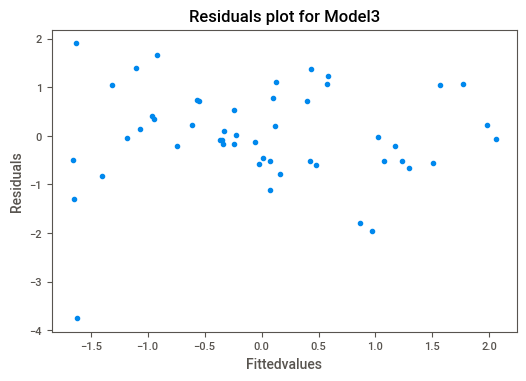

In [35]:
plt.scatter(get_standardized_values(model3.fittedvalues),
           get_standardized_values(model3.resid))
plt.title('Residuals plot for Model3')
plt.xlabel('Fittedvalues')
plt.ylabel('Residuals')
plt.show()


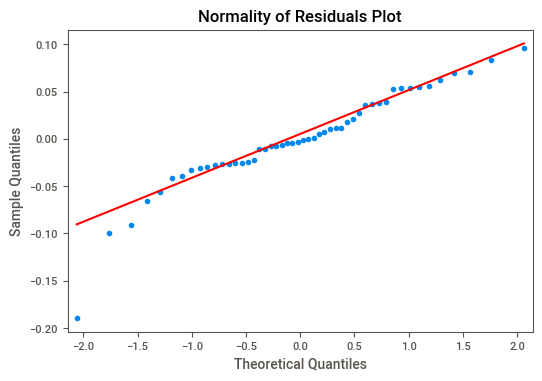

In [36]:
#Quantile-Quantile plot 
qqplot=sm.qqplot(model3.resid,line='q')
plt.title('Normality of Residuals Plot')
plt.show()


eval_env: 1


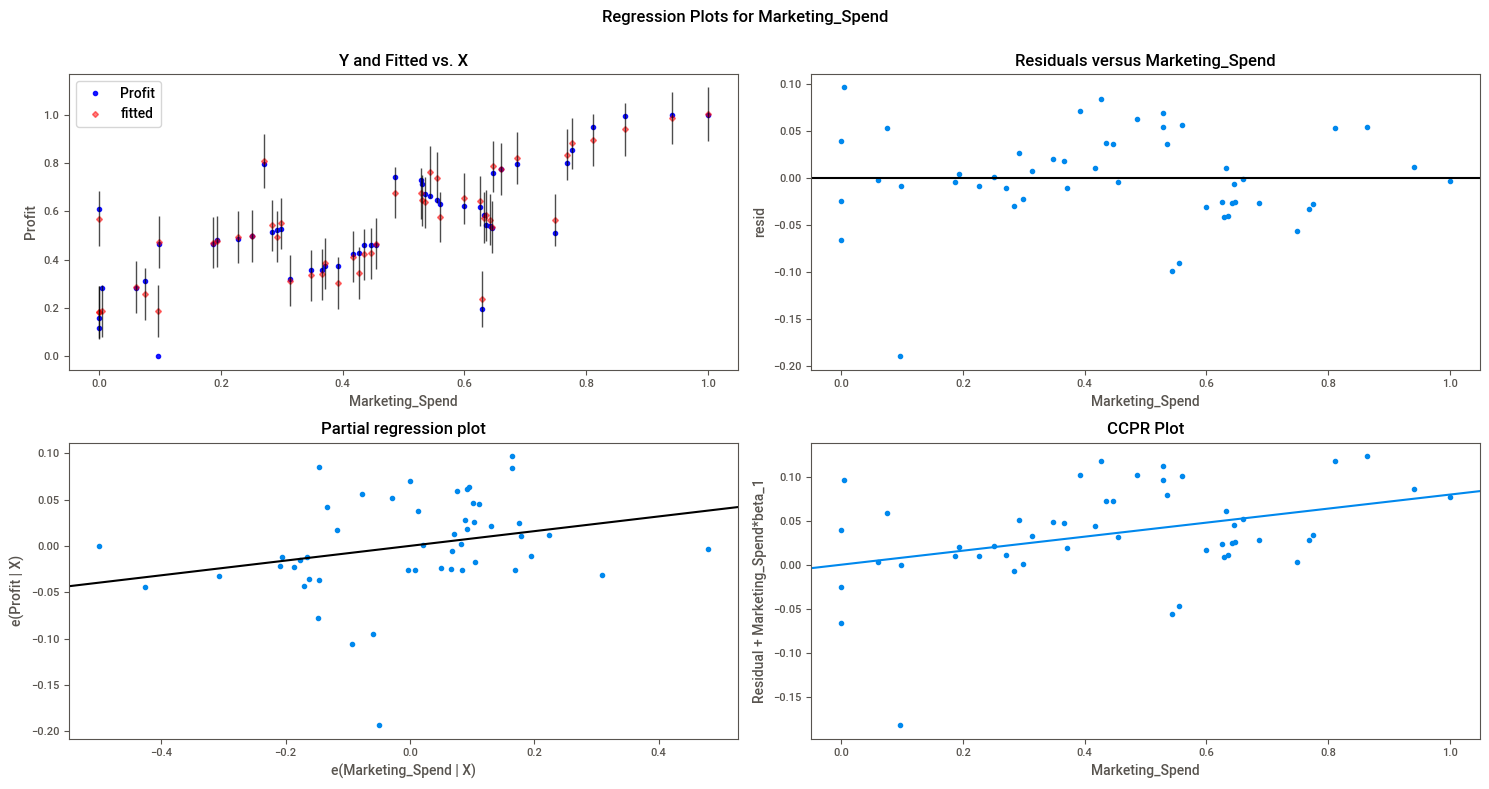

In [37]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model3,'Marketing_Spend',fig=fig)
plt.show()

eval_env: 1


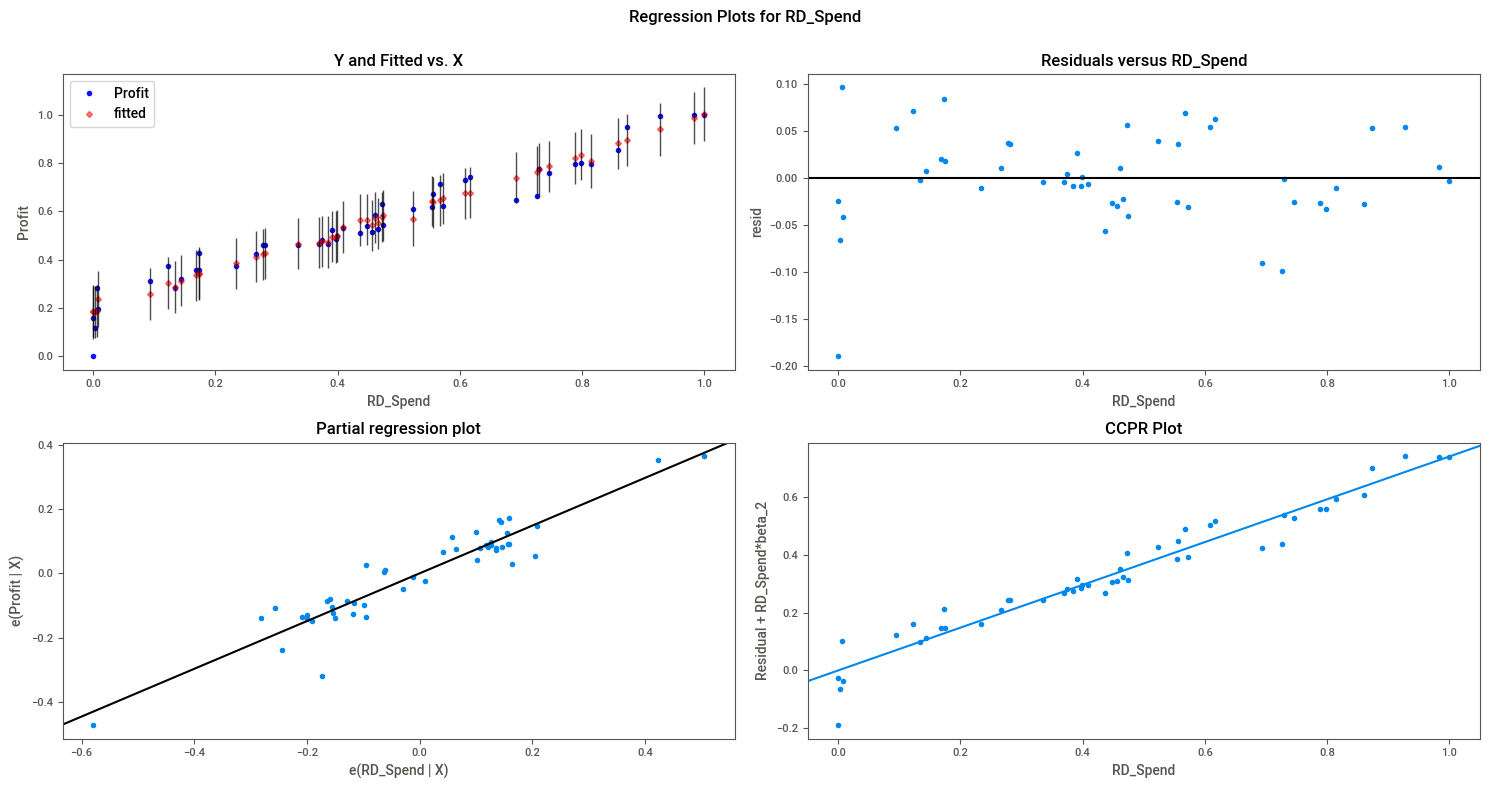

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model3,'RD_Spend',fig=fig)
plt.show()

In [43]:
model_influence=model3.get_influence()
(c,_)=model_influence.cooks_distance
summary_cooks=model_influence.summary_frame()
summary_cooks

,dfb_Intercept,dfb_Marketing_Spend,dfb_RD_Spend,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.013982,-0.009419,-0.006199,0.000182,-0.062732,0.121552,-0.023335,-0.062064,-0.023087
1,-0.046223,0.025396,0.028182,0.002177,0.233079,0.107323,0.080817,0.230720,0.079999
2,-0.178811,0.084367,0.136613,0.038503,1.101790,0.086885,0.339866,1.104361,0.340659
3,-0.142459,0.067708,0.119968,0.029739,1.072052,0.072037,0.298694,1.073796,0.299180
4,0.065260,-0.022536,-0.067850,0.007439,-0.558187,0.066841,-0.149390,-0.554057,-0.148285
5,0.067732,-0.045493,-0.051625,0.008873,-0.661981,0.057264,-0.163152,-0.657976,-0.162165
6,-0.013678,0.084561,-0.093726,0.003608,-0.228553,0.171645,-0.104038,-0.226234,-0.102983
7,0.038623,-0.003353,-0.062746,0.004980,-0.527015,0.051042,-0.122226,-0.522926,-0.121278
8,0.000629,-0.000207,-0.001050,0.000002,-0.011823,0.041535,-0.002461,-0.011696,-0.002435
9,0.026657,0.001559,-0.056404,0.004003,-0.511713,0.043850,-0.109585,-0.507656,-0.108716


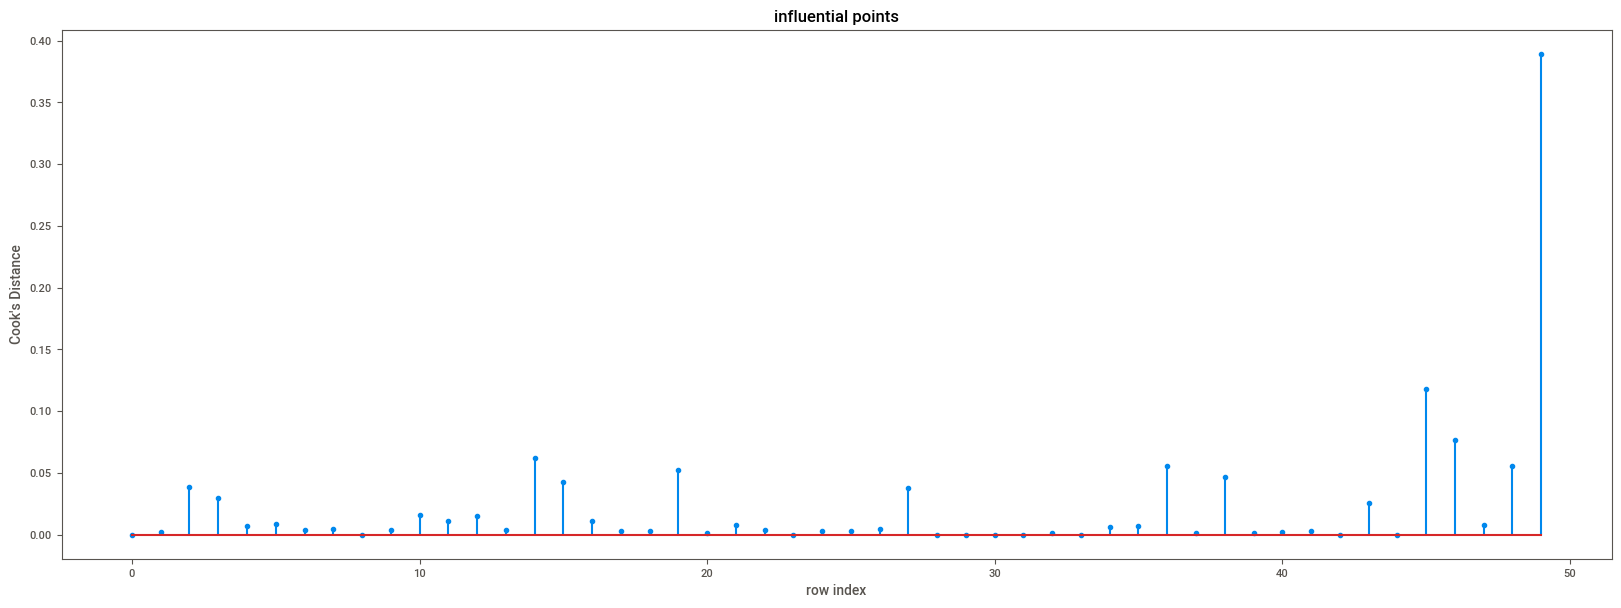

In [45]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(normdf1)),np.round(c,3))
plt.title("influential points")
plt.xlabel("row index")
plt.ylabel("Cook's Distance")
plt.show()

In [46]:
np.argmax(c),np.max(c)

(49, 0.3894886227924925)

In [ ]:
from tabulate import tabulate

In [ ]:
table=[['Model No.','Rsquared','Adj_Rsquared','AIC','BIC'],
       ['Model 1 ❌',model.rsquared,model.rsquared_adj,model.aic,model.bic],
       ['Model 2 ❌',model2.rsquared,model2.rsquared_adj,model2.aic,model2.bic],
       ['Model 3 ✔️',model3.rsquared,model3.rsquared_adj,model3.aic,model3.bic]]

In [ ]:
print(tabulate(table,headers='firstrow',tablefmt='grid',showindex=range(1,4)))

In [ ]:
model3.summary()